In [231]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

In [232]:
metric_file_name = 'Optimizer/Scale15/100-500-ctc1-clip-hard/metric_train_by_15_after_trained.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

In [233]:
df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,18:53:51,18:53:5,671.88460,458.339108,1,6.5,22.7,60.6,39.3,...,108519.2,866154.4,0.0,352343.6,100.0,1324.1,1324.1,1985.6,1324.1,1985.6
1,192.168.0.6,18:54:01,18:54:0,799.70190,486.898085,1,19.9,59.3,0.6,99.4,...,108993.6,870592.8,0.0,352471.6,100.0,2587.6,2587.6,5086.3,2587.0,5085.8
2,192.168.0.6,18:54:12,18:54:1,1831.66170,921.475086,1,23.2,54.4,0.5,99.5,...,108088.0,867580.8,0.0,352509.6,100.0,3008.1,3008.1,5887.0,3008.1,5887.3
3,192.168.0.6,18:54:20,18:54:2,2130.04230,641.757062,4,57.8,56.9,0.3,99.7,...,108131.6,870632.8,0.0,352510.0,100.0,3108.7,3108.7,5617.4,3108.7,5617.6
4,192.168.0.6,18:54:30,18:54:3,556.97075,374.540709,5,102.8,55.1,0.6,99.4,...,108158.8,871346.4,0.0,352505.2,100.0,2671.4,2671.4,5575.1,2671.4,5575.2


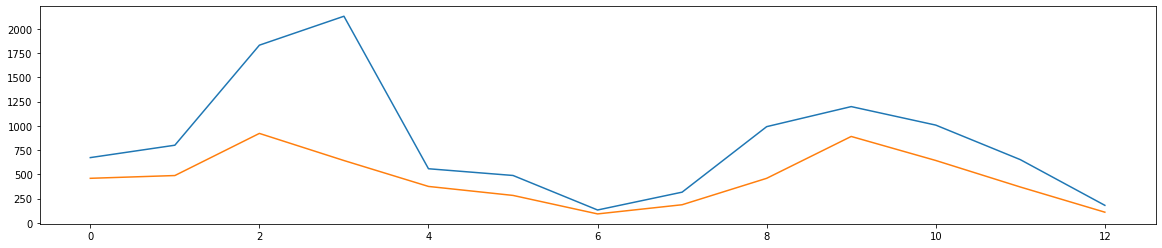

In [234]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.show()

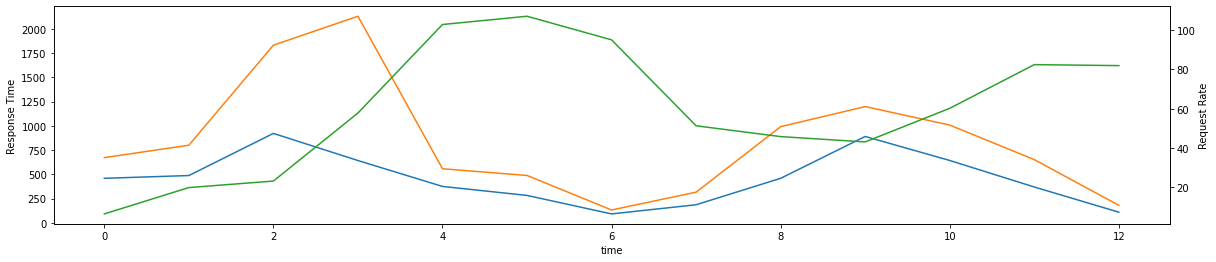

In [235]:
fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], color = 'C0')
ax1.plot(df['response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

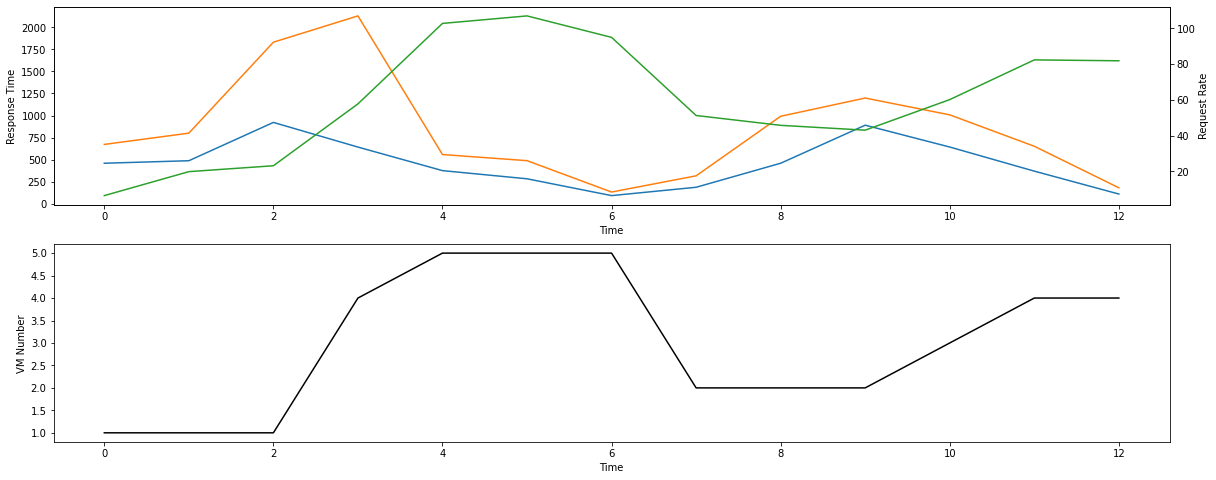

In [237]:
def wrt(df):
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(df['response_time'], color = 'C0')
    ax1.plot(df['response_time_p95'], color = 'C1')

    ax2 = ax1.twinx()

    ax2.plot(df['request_rate'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

wrt(df)

In [238]:
df.iloc[:, 0:5].describe()

,response_time_p95,response_time
count,13.000000,13.000000
mean,842.456919,454.597737
std,599.274949,265.606324
min,131.520100,91.068751
25%,487.607150,281.809890
50%,671.884600,458.316956
75%,1007.220300,641.757062
max,2130.042300,921.475086


In [239]:
df.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', '[DSK:sda]Reads', '[DSK:sda]RMerge',
       '[DSK:sda]RKBytes', '[DSK:sda]WaitR', '[DSK:sda]Writes',
       '[DSK:sda]WMerge', '[DSK:sda]WKBytes', '[DSK:sda]WaitW',
       '[DSK:sda]Request', '[DSK:sda]QueLen', '[DSK:sda]Wait',
       '[DSK:sda]SvcTim', '[DSK:sda]Util', '[NUMA:0]Used', '[NUMA:0]Free',
       '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[NUMA:0]AnonH',
       '[NUMA:0]Inactive', '[NUMA:0]Hits', '[TCPD]InReceives',
       '[TCPD]InDelivers', '[TCPD]OutRequests', '[TCPD]InSegs',
       '[TCPD]OutSegs'],
      dtype='object')

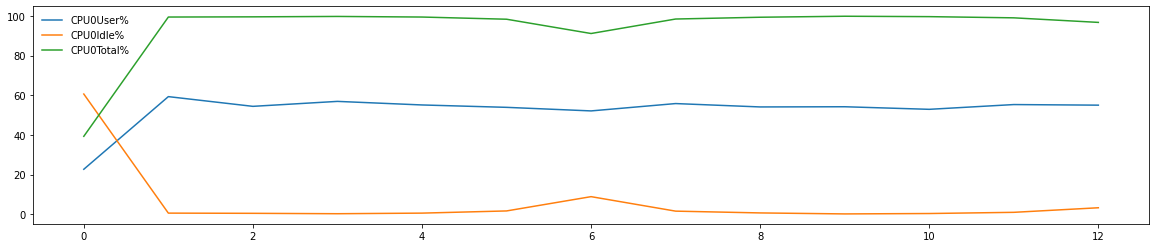

In [240]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'CPU' in col_name:
        plt.plot(df[col_name], label=col_name)

plt.legend(frameon=False)
plt.show()

## CPU Threshod és Response Time Threshold

Két féle skálázást csináltam azonos terheléssel.

A két féle skálázásból származó log filokat beolvasom és összehasonlítom.

In [241]:
metric_file_name_one = 'Optimizer/Scale15/100-500-ctc1/metric_train_by_15_after_trained.log'
metric_file_name_bad = 'Optimizer/Scale15/incorrect_100-500/metric_train_by_15_after_trained.log'

# a response timeossal kell majd összasonlítanom

# cpu_log
# rt_log
#

In [242]:
# df_cpu = pd.read_csv(cpu_log_file_name, sep=',', header=0)
# df_rt  = pd.read_csv(rt_log_file_name, sep=',', header=0)

df_one = pd.read_csv(metric_file_name_one, sep=',', header=0)
df_bad = pd.read_csv(metric_file_name_bad, sep=',', header=0)

In [243]:
# print(df_cpu.count()[0])
# print(df_rt.count()[0])

print(df_one.count()[0])
print(df_bad.count()[0])

43
44


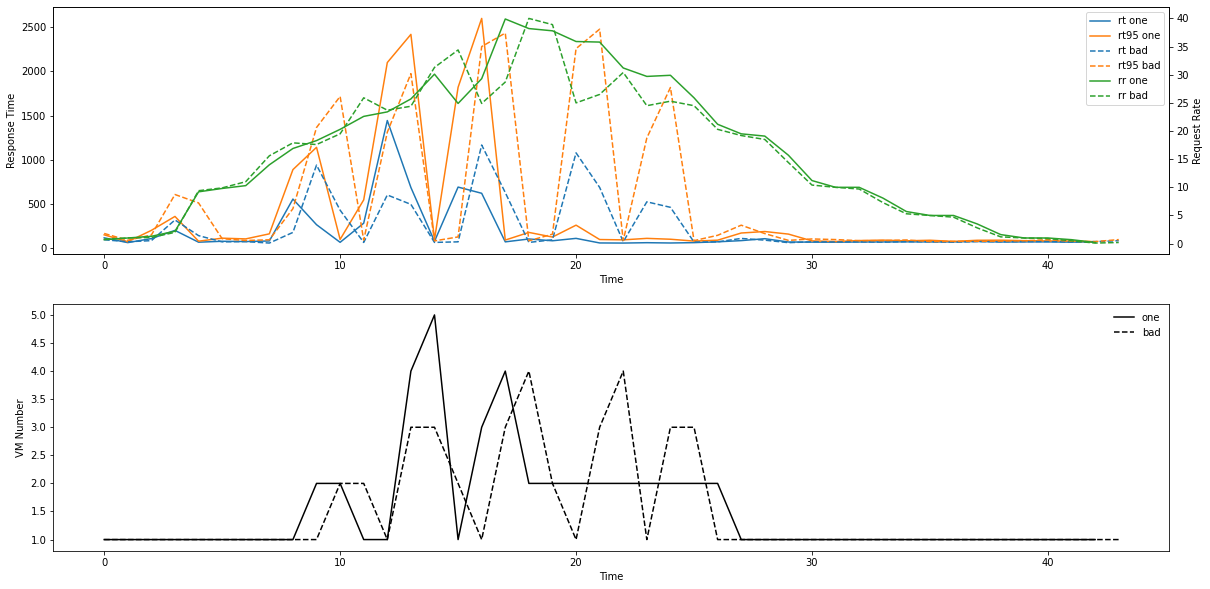

In [244]:
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_one['response_time'], color = 'C0', label = 'rt one')
lns2 = ax1.plot(df_one['response_time_p95'], color = 'C1', label = 'rt95 one')
lns3 = ax1.plot(df_bad['response_time'], color = 'C0', linestyle = 'dashed', label = 'rt bad')
lns4 = ax1.plot(df_bad['response_time_p95'], color = 'C1', linestyle = 'dashed', label = 'rt95 bad')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_one['request_rate'], color = 'C2', label = 'rr one')
lns6 = ax2.plot(df_bad['request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr bad')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_one['worker_number'], color = 'black', label = 'one')
ax3.plot(df_bad['worker_number'], color = 'black', linestyle = 'dashed', label = 'bad')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

## Melyik időpontban mit mondott volna

Egyébként ez meg lehetett volna csinálni úgy is hogy a scale alatt kiirom filébe és onnan olvasom be.

Vagy úgy ahogy most csinálom, hogy gyorsan reprodukálom.

In [245]:
import scale_by_train15 as scbt

from scale_by_train15 import read_trained_csv, get_train_features, get_current_worker_number, get_last_df_info

from scale_by_train15 import load_tf_model

In [246]:
trained_metric_file_name = scbt.trained_metric_file_name

input_variables = scbt.input_variables

trained_folder = scbt.trained_folder

In [247]:
print(trained_metric_file_name)

print(input_variables)

print(trained_folder)

./Train/Train15/metric_train_by_none.log
['request_rate', 'CPU0User%', '[TCPD]OutSegs']
/Train/Train15/


In [248]:
last_df = read_trained_csv(trained_metric_file_name)

train_features = get_train_features(last_df, input_variables)

current_worker_number = get_current_worker_number(last_df)

get_last_df_info(last_df)

model = load_tf_model(trained_folder)

print(train_features.shape)

predicted_labels = scbt.pred_rt(model, train_features)
print(predicted_labels)

aps = scbt.get_advice(w = current_worker_number, train_features = train_features, model = model, scale = 'OUT')

chosen_delta_vm = scbt.chose_action(aps, scale = 'OUT')


     request_rate  CPU0User%  [TCPD]OutSegs
223           0.3        6.4            3.0
wcsv -> 	223    21:01:54
Name: write_to_csv_time, dtype: object
tper -> 	223    21:01:5
Name: time, dtype: object
c_rt -> 	223    419.907333
Name: response_time, dtype: float64
(1, 3)
1/1 [==============================] - 0s 89ms/step
[[87.32847]]
1 9
[1, 2, 3, 4]
---------------------------------------
train_features -> azaz current metrics 
     request_rate  CPU0User%  [TCPD]OutSegs
223           0.3        6.4            3.0
---------------------------------------
train_features ...... [0.3 6.4 3. ]
0 request_rate
----------------------- pickle folder /home/ubuntu/Scaler/Train/Train15/lr/
[1.02434361 1.15767578] 0.17655714460201644
feature: 0.3 w: 5 a: 1
1 CPU0User%
----------------------- pickle folder /home/ubuntu/Scaler/Train/Train15/lr/
[0.87016971 0.58266153] 1.8585627908563147
feature: 6.4 w: 5 a: 1
2 [TCPD]OutSegs
----------------------- pickle folder /home/ubuntu/Scaler/Train/Train15/lr

In [249]:
from IPython.display import clear_output
from rich.progress import track
# https://rich.readthedocs.io/en/stable/progress.html

In [250]:

# Ez kurva jó

# Ez alapján már ki tudom számolni, hogy mikor mit skálázott és advicolt minden egyes pontra (s ez alapján [..])

# --

# Tehát van a beolvasott scaler adatom

# df = df_one.copy()

rts = []
apss = []
chosen_delta_vms = []

for i in range(len(df)):
# for i in range(10):
    
    clear_output(wait=True)
    
    print(' i ', i)

    last_df = df.iloc[[i]]

    train_features = get_train_features(last_df, input_variables)
    current_worker_number = get_current_worker_number(last_df)
    # get_last_df_info(last_df)
    model = load_tf_model(trained_folder)
    predicted_labels = scbt.pred_rt(model, train_features)
    
    rt = last_df['response_time'].values[0]
    
    if rt > scbt.RT_LIMIT_UPPER:
        aps = scbt.get_advice(w = current_worker_number, train_features = train_features, model = model, scale = 'OUT')
        chosen_delta_vm = scbt.chose_action(aps, scale = 'OUT')

    if rt < scbt.RT_LIMIT_LOWER:
        aps = scbt.get_advice(w = current_worker_number, train_features = train_features, model = model, scale = 'IN')
        chosen_delta_vm = scbt.chose_action(aps, scale = 'IN')

    apss.append(aps)
    chosen_delta_vms.append(chosen_delta_vm)


 i  12
    request_rate  CPU0User%  [TCPD]OutSegs
12          81.9       55.0         5203.4
1/1 [==============================] - 0s 81ms/step


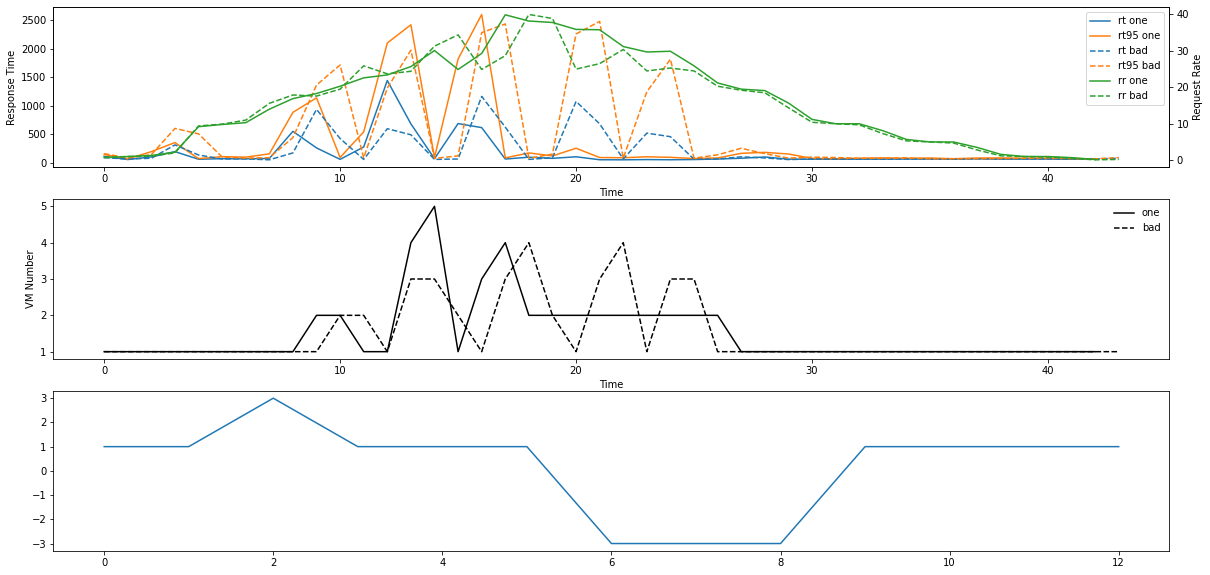

In [251]:
# Nézzük össze azt az eredményt amit így kaptam a eredeti filébe írt tényleges skálázási értékekkel

fig, (ax1, ax3, ax4) = plt.subplots(3, 1, figsize=(20, 10))

lns1 = ax1.plot(df_one['response_time'], color = 'C0', label = 'rt one')
lns2 = ax1.plot(df_one['response_time_p95'], color = 'C1', label = 'rt95 one')
lns3 = ax1.plot(df_bad['response_time'], color = 'C0', linestyle = 'dashed', label = 'rt bad')
lns4 = ax1.plot(df_bad['response_time_p95'], color = 'C1', linestyle = 'dashed', label = 'rt95 bad')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_one['request_rate'], color = 'C2', label = 'rr one')
lns6 = ax2.plot(df_bad['request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr bad')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_one['worker_number'], color = 'black', label = 'one')
ax3.plot(df_bad['worker_number'], color = 'black', linestyle = 'dashed', label = 'bad')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

ax4.plot(chosen_delta_vms)

plt.show()

In [252]:
# Az nagyon jól látszik, hogy változott meg a skálázás annak hatására hogy (2x) kell mérnie mielőtt
# ténylegesen dönt.

# Úgy látszik, hogy erre tényleg szükség van, hogy az új, vagy az elvolnt gép hatása szétterüljön a
# virtuális gépek között.

In [253]:
# Fent egy fontos megjegyzsé magamnak.

# Vigyázni kell ezzel az ábrával.

# Igy útolag javaslatok alapján nem egészen azt adja mint ténylegesen (de miért?)

# Az okát még nem értem de talán a scale programomban van hiba (hogy hol mikor kérek el, számitok ki mit)

# A javaslat utolag hasonló mint ami ténylegesen volt, de vannak eltérések.

# Például rögtön az elején a [8] és a [9] lépésben is hozzáadaott egyett - javaslat szintjén - akkor már 3
# darab vm-nek kéne lennie de csak kettő van a mérésben. A többi viszont jónak tűnik.

print(chosen_delta_vms)

[1, 1, 3, 1, 1, 1, -3, -3, -3, 1, 1, 1, 1]


# Clip Hard

Clip test.

In [260]:
test_folder = 'Optimizer/Scale15/100-500-ctc1-clip-hard/'
metric_file_name = 'metric_train_by_15_after_trained.log'

metric_file_name = metric_file_path = test_folder + metric_file_name

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,18:53:51,18:53:5,671.88460,458.339108,1,6.5,22.7,60.6,39.3,...,108519.2,866154.4,0.0,352343.6,100.0,1324.1,1324.1,1985.6,1324.1,1985.6
1,192.168.0.6,18:54:01,18:54:0,799.70190,486.898085,1,19.9,59.3,0.6,99.4,...,108993.6,870592.8,0.0,352471.6,100.0,2587.6,2587.6,5086.3,2587.0,5085.8
2,192.168.0.6,18:54:12,18:54:1,1831.66170,921.475086,1,23.2,54.4,0.5,99.5,...,108088.0,867580.8,0.0,352509.6,100.0,3008.1,3008.1,5887.0,3008.1,5887.3
3,192.168.0.6,18:54:20,18:54:2,2130.04230,641.757062,4,57.8,56.9,0.3,99.7,...,108131.6,870632.8,0.0,352510.0,100.0,3108.7,3108.7,5617.4,3108.7,5617.6
4,192.168.0.6,18:54:30,18:54:3,556.97075,374.540709,5,102.8,55.1,0.6,99.4,...,108158.8,871346.4,0.0,352505.2,100.0,2671.4,2671.4,5575.1,2671.4,5575.2


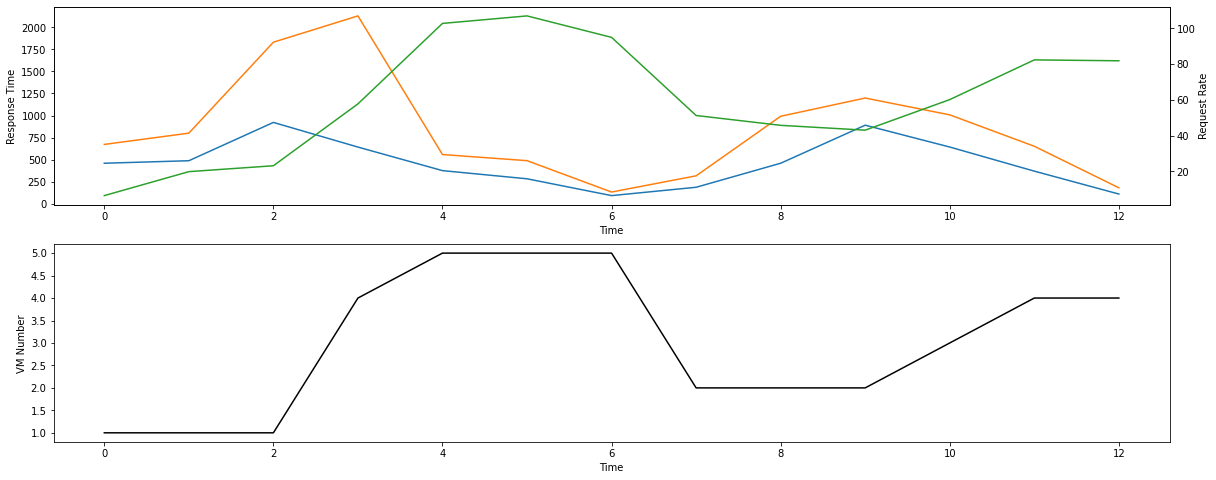

In [261]:
wrt(df)

# Tulikép ToDo

Ami itt ebben a notebookban ez után következik az lett megvalósítva a JMeter_Reader-ben (lényegében ez alapján)

Össze kell hasonlítani a két részt. És ha redundást akkor az itteni részt törölni.

De csak ellenörzés után.

---

Ugyanakkor arra jöttem rá, hogy nem feltétlenül baj az, hogy ha ez a rész itt is megvan mert ebbne a filében
benne vannak a metriák is, amikr a JMeter Reader-ben nincsenek.

# 100-500-ctc1-cliphard

Az van, hogy itt 10 másodperces mintavételezés van ami nem rossz, és rendszer is jól müködik,
de sokkal pontosabb összehasonlítást tudnék véghez vinni, ha a JMeterből kiexportált adatokat
válaszidőket hasonlítanám össze.

Mert fent ugye a 10 másodpercre vett átlagok vannak. Ami jó a skálázásnál, de jobb lenne ha [.]

In [262]:
jm_file_name     = 'adviser_015_100-500-ctc1-clip-hard.csv'

jm_file_path = test_folder + jm_file_name

jf = pd.read_csv(jm_file_path, sep=',', header=0)

jf['RT_LIMIT_UPPER'] = scbt.RT_LIMIT_UPPER
jf['RT_LIMIT_LOWER'] = scbt.RT_LIMIT_LOWER

jf.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1684349627142,524,HTTP Request,200,NaN,jp@gc - Ultimate Thread Group 1-9,text,True,NaN,337,133,10,10,http://193.225.250.30/io/1/dir_path/250,524,0,7,500,100
1,1684349627135,531,HTTP Request,200,NaN,jp@gc - Ultimate Thread Group 1-5,text,True,NaN,337,133,10,10,http://193.225.250.30/io/1/dir_path/250,531,0,4,500,100


## Ez az ábrázolás itt roszz

Tegnap azon dolgoztam, hogy ezt kijavítsam

Az eredmény lent a notebook végén.

**Az a baj ezzel, hogy** az elmúlt 10 kérés válaszidejének átlagát veszi, nem pedig az elmúlt 10 másodperc átlagát.

In [263]:
jf['ma10rt'] = jf['Latency'].rolling(10).mean()

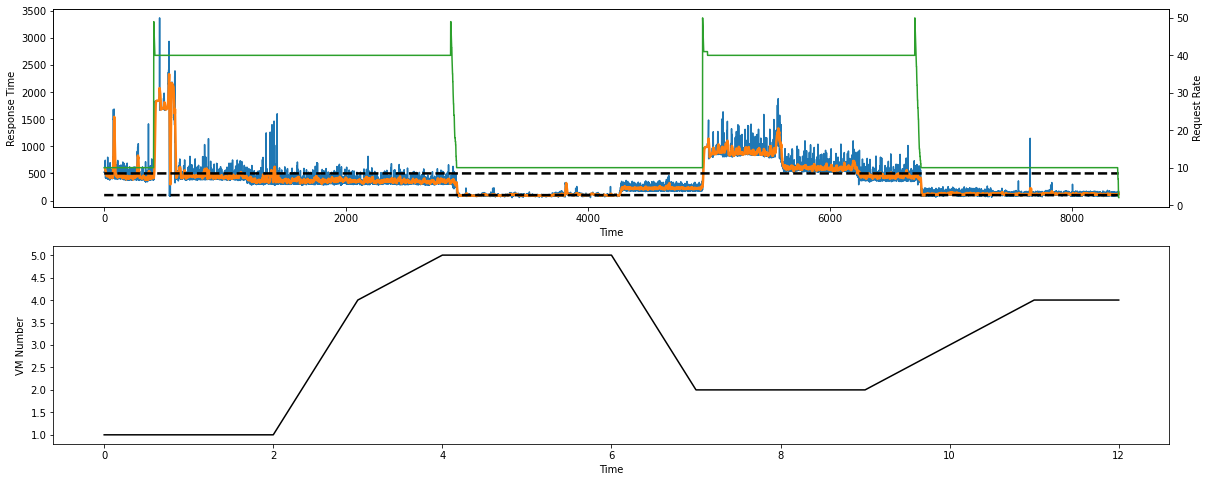

In [264]:
def jmf():
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(jf['Latency'], color = 'C0')
    
    ax1.plot(jf['ma10rt'], color = 'C1', lw = 2.5)
    
    ax1.plot(jf['RT_LIMIT_LOWER'], color = 'black', lw = 2.5, ls = '--')
    ax1.plot(jf['RT_LIMIT_UPPER'], color = 'black', lw = 2.5, ls = '--')
    

    ax2 = ax1.twinx()

    ax2.plot(jf['allThreads'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

jmf()

Ahhoz, hogy meg tudjam csinálni azt, hogy kiszámolom az elmúlt 10 másodperc átlagát számos átalakítást kell végeznem.

In [265]:
import datetime

# Valójában ez mind szar, nem ezt akarom kiszámolni, hanem azt adott időszeletekben vett átlagot

jf = jf.astype({'timeStamp':'int'})

jf['date'] = jf['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))

jf.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,...,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER,ma10rt,date
0,1684349627142,524,HTTP Request,200,NaN,jp@gc - Ultimate Thread Group 1-9,text,True,NaN,337,...,10,10,http://193.225.250.30/io/1/dir_path/250,524,0,7,500,100,NaN,2023-05-17 18:53:47.142
1,1684349627135,531,HTTP Request,200,NaN,jp@gc - Ultimate Thread Group 1-5,text,True,NaN,337,...,10,10,http://193.225.250.30/io/1/dir_path/250,531,0,4,500,100,NaN,2023-05-17 18:53:47.135


In [266]:
print(jf['timeStamp'].values.dtype)
print(jf['date'].values.dtype)

int64
datetime64[ns]


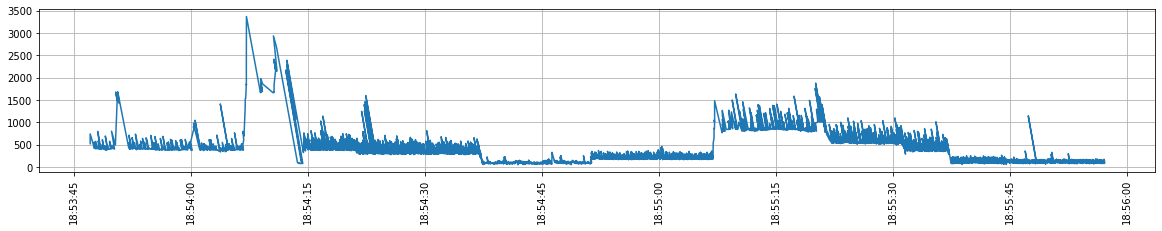

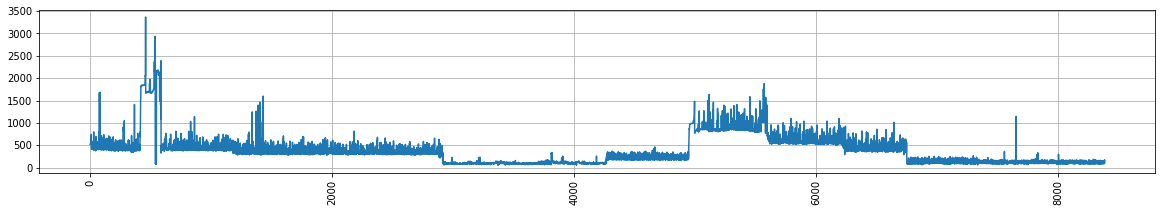

In [267]:
# A válaszidők értéke a hozzájuk tartozó időbélyegkez igazítva
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')


# A válaszidők értéke egymás után  sorrendben.
plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

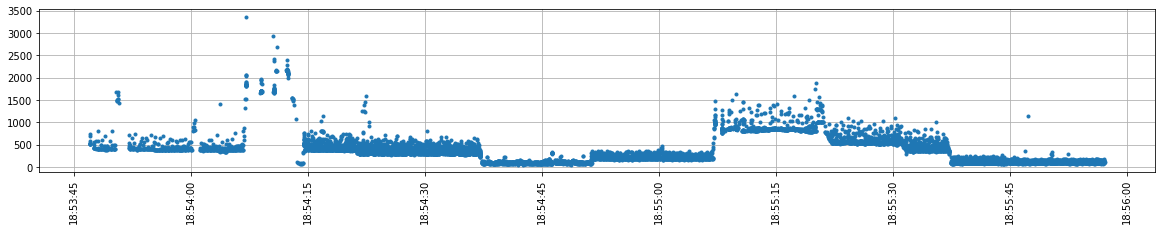

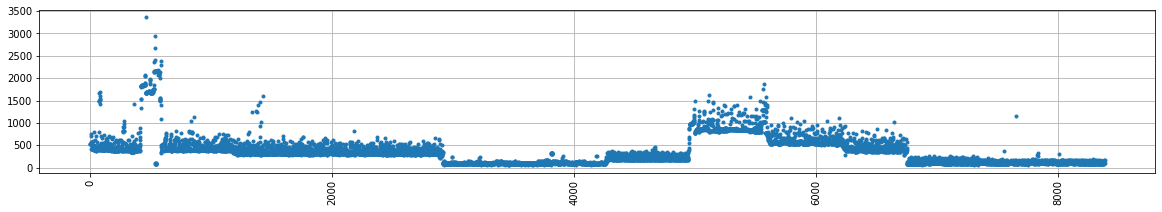

In [268]:
# A válaszidők értéke a hozzájuk tartozó időbélyegkez igazítva
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')


# A válaszidők értéke egymás után  sorrendben.
plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

In [269]:

# ha akarnék scatterezni, de nem akarok

jf['_x'] = np.arange(0, jf['Latency'].size)


In [270]:

# rá kell toszni még a rolling meant és az időre számolt átlagot (ez a 'rossz')

jf['ma10rt'] = jf['Latency'].rolling(10).mean()


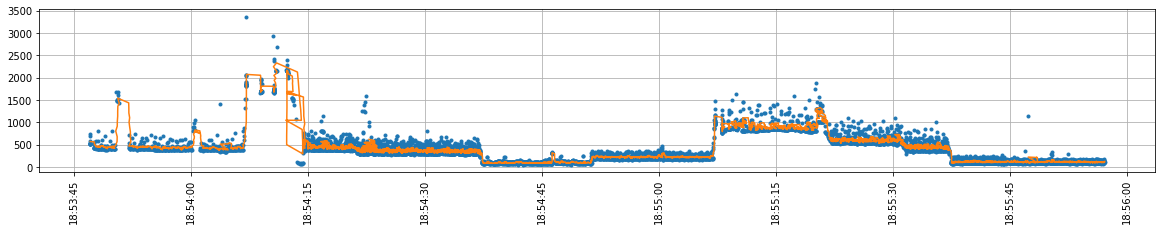

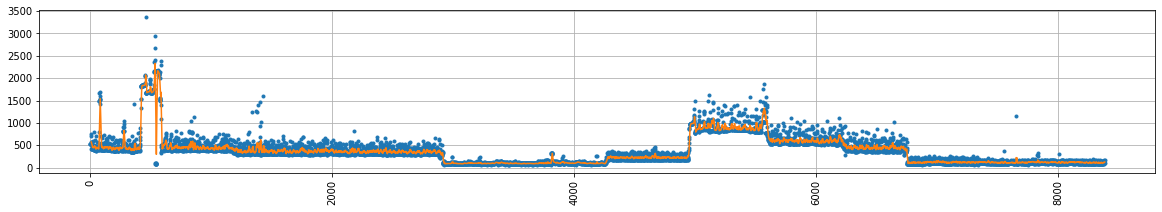

In [271]:
# A válaszidők értéke a hozzájuk tartozó időbélyegkez igazítva
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

# A válaszidők értéke egymás után  sorrendben.
plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

In [272]:
jf.groupby([jf['date'].dt.hour]).Latency.mean()

date
18    371.703554
Name: Latency, dtype: float64

In [273]:
jf.groupby([jf['date'].dt.minute]).Latency.mean()

date
53    490.513109
54    343.593928
55    396.162119
Name: Latency, dtype: float64

In [274]:
jf.groupby(by=[jf.date.map(lambda x : x.hour),
               jf.date.map(lambda x : x.minute)]).Latency.mean()

date  date
18    53      490.513109
      54      343.593928
      55      396.162119
Name: Latency, dtype: float64

In [275]:
jf['date'][0].year
jf['date'][0].month
jf['date'][0].day
jf['date'][0].hour
jf['date'][0].minute
jf['date'][0].second

47

In [276]:
jf['minute'] = jf['date'].map(lambda x : x.minute)
jf['second'] = jf['date'].map(lambda x : x.second)
jf['sec']    = jf['date'].map(lambda x : x.second//10)

In [277]:
md = jf.groupby([jf['date'].dt.minute, jf['date'].dt.second]).Latency.mean()

In [278]:
md

date  date
53    47       515.400000
      48       453.565217
      49       457.608696
      50      1048.055556
      52       473.772727
                 ...     
55    53       119.200000
      54       120.388235
      55       114.218391
      56       110.616279
      57       125.909091
Name: Latency, Length: 130, dtype: float64

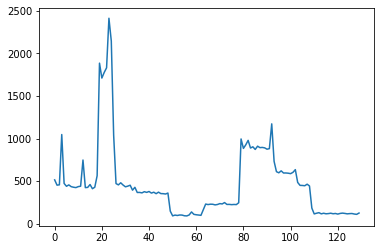

In [279]:
# A válaszidők perces átlaga a hozzájuk tartozó időbélyegkez igazítva
plt.plot(md.values)

In [280]:
# De még meg kell csinálnom a hozzájuk tartozó időbélyegeket

tp = []

start_date = str(jf['date'].loc[0])[:14] # '2023-05-17 18:'

for _ in md.index:
    m = _[0] # perc
    s = _[1] # másodperc
    tp.append(start_date + str(m) + ':' + str(s)) # '2023-05-17 18:57:31'

tp = pd.DataFrame(tp, columns=['date'])
tp = pd.to_datetime(tp['date'])
tp.head(3)

tp = pd.DataFrame(tp)
tp['md'] = 100
tp['md'] = md.values # másodperc alapú Latency átlagok
tp.head()

,date,md
0,2023-05-17 18:53:47,515.400000
1,2023-05-17 18:53:48,453.565217
2,2023-05-17 18:53:49,457.608696
3,2023-05-17 18:53:50,1048.055556
4,2023-05-17 18:53:52,473.772727


In [168]:
jf.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,...,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER,ma10rt,date,_x,minute,second,sec
0,1684349627142,524,HTTP Request,200,NaN,jp@gc - Ultimate Thread Group 1-9,text,True,NaN,337,...,0,7,500,100,NaN,2023-05-17 18:53:47.142,0,53,47,4
1,1684349627135,531,HTTP Request,200,NaN,jp@gc - Ultimate Thread Group 1-5,text,True,NaN,337,...,0,4,500,100,NaN,2023-05-17 18:53:47.135,1,53,47,4


In [281]:
mz = jf.groupby([jf['date'].dt.minute, jf['sec']]).Latency.mean()

In [282]:
mz # 10 másodperces Latency átlagok

date  sec
53    4      473.712121
      5      496.029851
54    0      939.445887
      1      651.537671
      2      384.303589
      3      290.945065
      4      103.803797
      5      196.251462
55    0      472.328976
      1      899.490783
      2      650.596026
      3      377.642424
      4      120.352010
      5      118.238655
Name: Latency, dtype: float64

In [283]:
# Meg van a 10 másodperces, ehhez kell legyártani most a dátumokat

# 10 másodperces

tt = []
tz = []

start_date = str(jf['date'].loc[0])[:14] # '2023-05-17 18:'

_first_sec = jf['second'].loc[0]

c = 0
for _ in mz.index:
    m = _[0] # perc
    s = _[1] # másodperc
    if c == 0:
        c += 1
        tt.append([m, s])
        tz.append(start_date + str(m) + ':' + str(_first_sec)) # '2023-05-17 18:57:31'
    else:
        tt.append([m, s])
        tz.append(start_date + str(m) + ':' + str(s*10)) # '2023-05-17 18:57:40'
    # print(s, _)

tz = pd.DataFrame(tz, columns=['date'])
tz.head()

tz = pd.to_datetime(tz['date'])
tz.head()

tz = pd.DataFrame(tz)
tz['mz'] = 100
tz['mz'] = mz.values
tz.head()

# Össze van fűzve a tz (idő) és az mz (group by sec) -> lehet rátenni a plotra

,date,mz
0,2023-05-17 18:53:47,473.712121
1,2023-05-17 18:53:50,496.029851
2,2023-05-17 18:54:00,939.445887
3,2023-05-17 18:54:10,651.537671
4,2023-05-17 18:54:20,384.303589


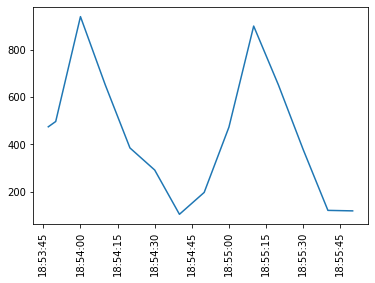

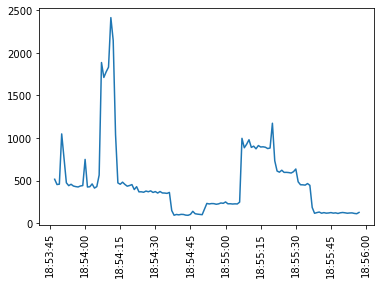

In [284]:
plt.plot(tz['date'], tz['mz'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a tiz másodperc alapú)

plt.plot(tp['date'], tp['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a másodperc másodperc alapú)

In [285]:
tp['date'][0]  # másodperc alaú átlag

Timestamp('2023-05-17 18:53:47')

In [286]:
tz['date'][0]  # 10 másodperc alapú átlag

Timestamp('2023-05-17 18:53:47')

In [287]:
jf['date'][0]  # az eredeti bejegyzés elős időbélyege

Timestamp('2023-05-17 18:53:47.142000')

In [288]:
from datetime import datetime, timedelta

In [289]:
# tz['date'] = tz['date'] + timedelta(seconds=1)

In [290]:
# tp['date'] = tp['date'] + timedelta(seconds=1)

In [291]:
# ami eddig volt az a másodperces

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 <a list of 7 Text major ticklabel objects>)

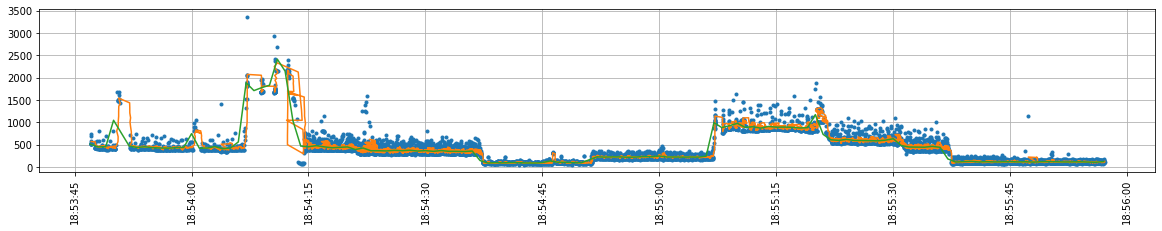

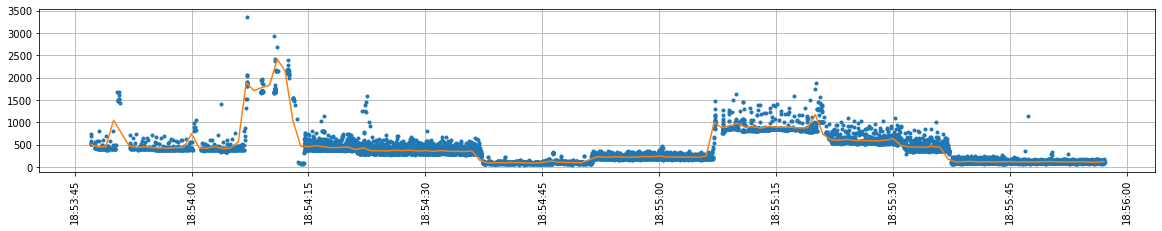

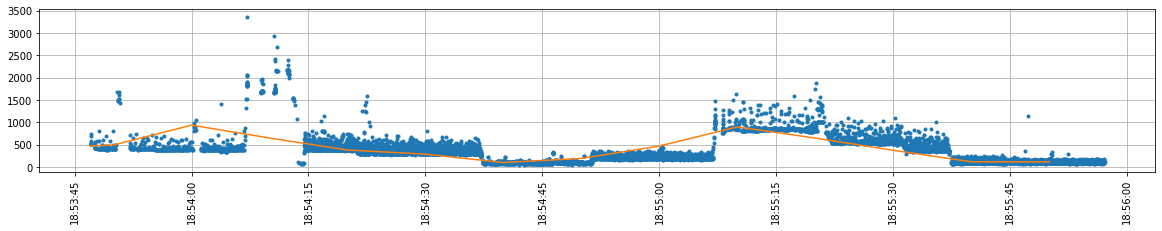

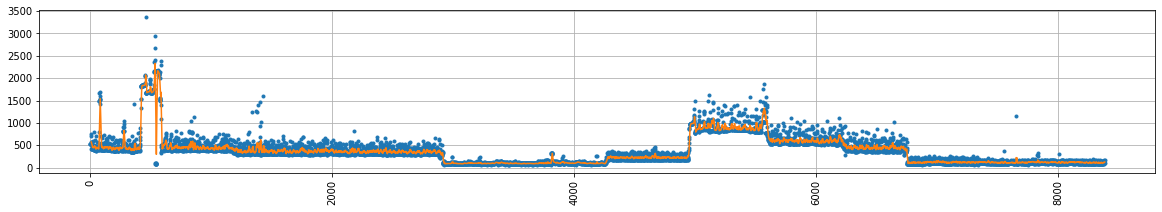

In [292]:
# Másodperc alapú áltag és sequence alapú átlag összehasonlítsa
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])  # sequence alapú átlag
plt.plot(tp['date'], tp['md'])      # másodperc alapő átlag
plt.grid(b='on')
plt.xticks(rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)

# 10 Másodperc alapú átlag (jo) -> esetleg még ez (ha nagyon sok adat van és hosszú volt a futás)
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tz['date'], tz['mz'])
plt.grid(b='on')
plt.xticks(rotation=90)

# Sequence alapú (ahogy jöttek be a kérések úgy van plottolva sorban egymás után)
plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)

## Azt azért tudni kell

Hogy az így kapott 10 másodperces Latency átlagok nem lesznek szinkronban a Metric.log fileban eltárolt az Apache Load Ballencertől (Reverse Proxy) kinyert válaszidők átlagaival.

**De miért?**

Mert a - sajnos vagy nem, de most még csak így tudtam megoldani - a log kiolvasás akkor hívodik meg amikor egy kérés beérkezik. Igy van megírva a kis Python sricpt ami a metrikákat az access.log-ot kiolvassa.

Jobb lenne ha periodikusan - ütemezve - olvasná ki adott időközönként - de most még nem így működik és az első cikk megírásáig nem is fogom már ezt átírni.

**Sanos** ahogy én látom most, ez a leggyengébb része a rendzeremnek, de ez nem okoz problémát, ha elég sűrün
érkeznek be a kérések.


## Tehát ez volt a rossz amit ki akartam javítani.

De ami még hiányzik, hogy a fentire rátegyem a VM-ek számának alaulását.

(Ugye az van hogy a két adat kétféle adatbáisból jön)

Az egyes Latencyket a JMeter, A metrikákat (így a VM számot is a LoadBalacner) rögzítette

Ezt a kettőt kell összefésülni.

Most van az, hogy jól jönne a scaler.log mert a metric.log csak 10 másodpercenként mintavételez, de lehet, hogy már a mintavételezés felénél meg volt a skálázás és ezt jó lenne látni, főként azért hogy korrelál a nagy felbontású válaszidő alakulásával ami meg a JMeterből jön.

In [293]:

# ---

# scale_file_name = 'Optimizer/Scale15/100-500-ctc1-clip-hard/scaled_train_by_15_after_trained.log'

scale_file_name = 'scaled_train_by_15_after_trained.log'

scale_file_path = test_folder + scale_file_name

sf = pd.read_csv(scale_file_path, sep=',', header=0)

display(sf.head(2))

# ---


,time,notification,actual_vm_number_was,actual_vm_number_is
0,18:54:13,Worker 192.168.0.73 added.,1,2
1,18:54:13,Worker 192.168.0.91 added.,2,3


Az sf (slacer.log) alapján meg lehetne mondani, hogy mikor mi volt a gépek száma.


A jf.date (datetime64) végig lehet iterálni a jf összes során és összenézni az sf time (??) sorával

In [296]:
sf['time']

# Ez sajnos nekem még kevés ugyhogy picit átalkítom

0    18:54:13
1    18:54:13
2    18:54:13
3    18:54:21
4    18:54:51
5    18:54:51
6    18:54:51
7    18:55:21
8    18:55:31
Name: time, dtype: object

In [318]:
start_date = str(jf['date'].loc[0])[:11] # '2023-05-17 18:'
print(start_date)

sf['date'] = start_date + sf['time']

sf['date'] = sf['date'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))

sf.head(3)

# kiegészítettem az év:hónap:nap-pal

2023-05-17 


,time,notification,actual_vm_number_was,actual_vm_number_is,date
0,18:54:13,Worker 192.168.0.73 added.,1,2,2023-05-17 18:54:13
1,18:54:13,Worker 192.168.0.91 added.,2,3,2023-05-17 18:54:13
2,18:54:13,Worker 192.168.0.93 added.,3,4,2023-05-17 18:54:13


In [319]:
sf['date']

0   2023-05-17 18:54:13
1   2023-05-17 18:54:13
2   2023-05-17 18:54:13
3   2023-05-17 18:54:21
4   2023-05-17 18:54:51
5   2023-05-17 18:54:51
6   2023-05-17 18:54:51
7   2023-05-17 18:55:21
8   2023-05-17 18:55:31
Name: date, dtype: datetime64[ns]

In [295]:
jf['date']

0      2023-05-17 18:53:47.142
1      2023-05-17 18:53:47.135
2      2023-05-17 18:53:47.140
3      2023-05-17 18:53:47.138
4      2023-05-17 18:53:47.137
                 ...          
8381   2023-05-17 18:55:57.034
8382   2023-05-17 18:55:57.040
8383   2023-05-17 18:55:57.042
8384   2023-05-17 18:55:57.056
8385   2023-05-17 18:55:57.116
Name: date, Length: 8386, dtype: datetime64[ns]

In [325]:
sf.head(10)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
0,18:54:13,Worker 192.168.0.73 added.,1,2,2023-05-17 18:54:13
1,18:54:13,Worker 192.168.0.91 added.,2,3,2023-05-17 18:54:13
2,18:54:13,Worker 192.168.0.93 added.,3,4,2023-05-17 18:54:13
3,18:54:21,Worker 192.168.0.146 added.,4,5,2023-05-17 18:54:21
4,18:54:51,Worker 192.168.0.73 removed.,5,4,2023-05-17 18:54:51
5,18:54:51,Worker 192.168.0.91 removed.,4,3,2023-05-17 18:54:51
6,18:54:51,Worker 192.168.0.93 removed.,3,2,2023-05-17 18:54:51
7,18:55:21,Worker 192.168.0.73 added.,2,3,2023-05-17 18:55:21
8,18:55:31,Worker 192.168.0.91 added.,3,4,2023-05-17 18:55:31


In [328]:
jf['date'].iloc[3]

Timestamp('2023-05-17 18:53:47.138000')

In [342]:
jf['dates'] = jf['date'].apply(lambda d: d.replace(microsecond=0))

In [344]:
jf['dates'].iloc[3]

Timestamp('2023-05-17 18:53:47')

In [1]:
# most az sf-t össze mergelem a jf-el a következő módon

_first_vm_number = sf['actual_vm_number_was'].iloc[0]
print(_first_vm_number)

_last_vm_number = sf['actual_vm_number_is'].iloc[-1]
print(_last_vm_number)

_len_sf = len(sf)

_current_vm_number = _first_vm_number

_first_scale_date = sf['date'].iloc[0]
_current_scale_date = _first_scale_date

jf['sf_vm'] = 0

c = 0

for i in range(jf['Latency'].shape[0]):
    jf['sf_vm'].iloc[i] = _current_vm_number

    jf_date = jf['dates'].iloc[i]

    if c < len(sf):
        if jf_date == _current_scale_date:
            print('    Scale', jf_date, _current_scale_date, _current_vm_number)
            _current_vm_number = sf['actual_vm_number_is'].iloc[c]
            if c + 1 < len(sf):
                _current_scale_date = sf['date'].iloc[c + 1]
                print('--> Scale', jf_date, _current_scale_date, _current_vm_number)


            c += 1
            print(c)


NameError: name 'sf' is not defined

In [ ]:

# Most van egy olyan jf dataframem amiben benne van a JMeter adat és a Scaler.log-ból származó skálázások is

# Érdemes lenne egy plotton ábrázolni a korábban már megcsinált 1 másodpercre, 10 másodpercre aggregált
# átalgos válaszidőket és a virtuális gépke számát is


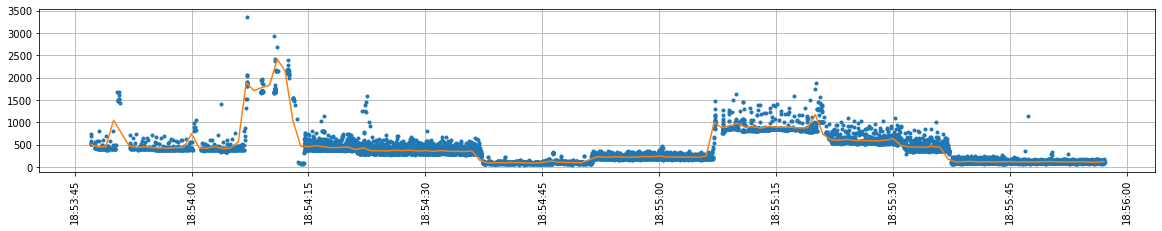

In [369]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

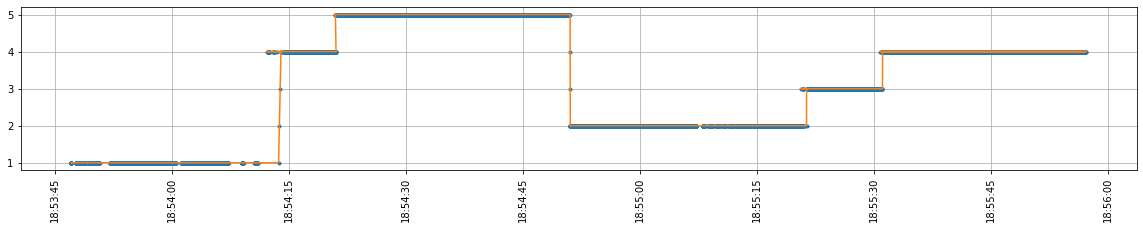

In [388]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['sf_vm'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [379]:
sf.head(10)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
0,18:54:13,Worker 192.168.0.73 added.,1,2,2023-05-17 18:54:13
1,18:54:13,Worker 192.168.0.91 added.,2,3,2023-05-17 18:54:13
2,18:54:13,Worker 192.168.0.93 added.,3,4,2023-05-17 18:54:13
3,18:54:21,Worker 192.168.0.146 added.,4,5,2023-05-17 18:54:21
4,18:54:51,Worker 192.168.0.73 removed.,5,4,2023-05-17 18:54:51
5,18:54:51,Worker 192.168.0.91 removed.,4,3,2023-05-17 18:54:51
6,18:54:51,Worker 192.168.0.93 removed.,3,2,2023-05-17 18:54:51
7,18:55:21,Worker 192.168.0.73 added.,2,3,2023-05-17 18:55:21
8,18:55:31,Worker 192.168.0.91 added.,3,4,2023-05-17 18:55:31


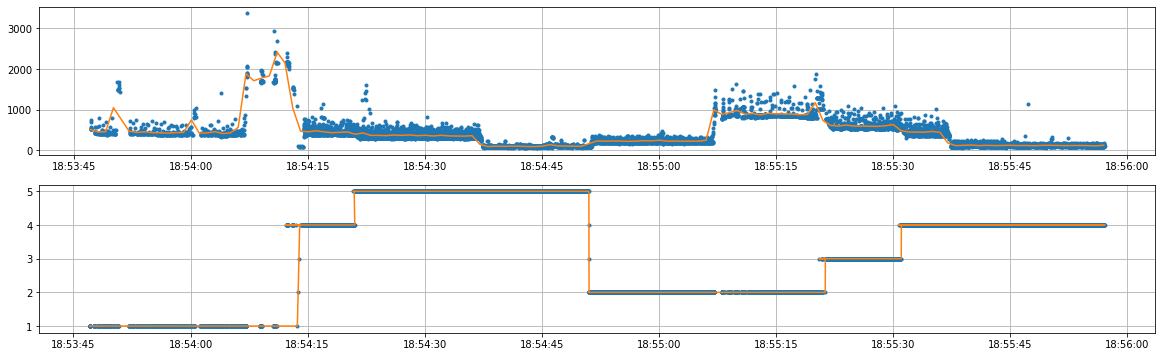

In [398]:
# Na most akkor a kettő együtt

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
ax0.plot(tp['date'], tp['md'])
ax0.grid(b='on')
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
ax1.plot(jf['date'], jf['sf_vm'])
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

    nem az ábra alapján vonnám le ezt a tanulságot de a skálázás hatása elég gyorsan jelentkezik

## Helpers

In [2]:
# Ha szövegből kell datatimeot csinálnom

from datetime import datetime

datetime_str = '2023-05-17 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

print(type(datetime_object))
print(datetime_object)


<class 'datetime.datetime'>
2023-05-17 13:55:26
